# Top Hits Spotify (2000 - 2019) - EDA

## Introduction
In this notebook, we will perform an Exploratory Data Analysis (EDA) on a dataset that contains the top Spotify hits from 2000 to 2019.

The main objectives of this analysis are:
- To understand the characteristics of the most popular songs.
- To identify patterns and relationships between different song features such as tempo, energy, danceability, etc.
- To gain insights into what makes a song a "hit".

## The Dataset
The dataset includes information about:
- Song name
- Artist name
- Release year
- Audio features (acousticness, danceability, energy, instrumentalness, etc.)
- Duration
- Popularity score on Spotify

## Steps
1. Import necessary libraries
2. Load the dataset
3. Initial exploration of the dataset
   - Overview of rows and columns
   - Check for missing values
   - Data types
4. Descriptive statistics
   - Summary statistics (mean, median, standard deviation, etc.)
   - Distribution of features
5. Visual analysis
   - Histograms, boxplots, scatterplots
   - Heatmap to check correlations between features
   - Trends of features over the years

## Goals
- What are the most common features of popular songs?
- How have song characteristics changed from 2000 to 2019?
- Are there strong correlations between popularity and features like energy or danceability?

## Expected Outcomes
- Visualizations and explanations of the findings
- Insights about the most successful songs
- Conclusions and possible recommendations based on the data

## Next Step
After completing the EDA, we can consider building a predictive model to estimate the probability of a song becoming a hit based on its features.


## Context
This dataset contains audio statistics of the top 2000 tracks on Spotify from 2000 to 2019. The dataset includes 18 columns, each describing a track and its musical qualities.

## Content

- **artist**: Name of the artist.
- **song**: Name of the track.
- **duration_ms**: Duration of the track in milliseconds.
- **explicit**: Indicates whether the track contains explicit content that may be offensive or unsuitable for children.
- **year**: Release year of the track.
- **popularity**: Popularity score of the track. The higher the value, the more popular the song is.
- **danceability**: Describes how suitable a track is for dancing based on musical elements such as tempo, rhythm stability, beat strength, and regularity. Ranges from 0.0 (least danceable) to 1.0 (most danceable).
- **energy**: A measure from 0.0 to 1.0 representing the intensity and activity of the track.
- **key**: The key the track is in, represented as an integer using Pitch Class notation (e.g., 0 = C, 1 = C♯/D♭, 2 = D, etc.). -1 indicates no key was detected.
- **loudness**: The overall loudness of the track in decibels (dB), averaged across the entire track. Typically ranges from -60 to 0 dB.
- **mode**: Indicates the modality (scale) of the track. Major is represented by 1 and minor by 0.
- **speechiness**: Detects the presence of spoken words. Values closer to 1.0 indicate more speech-like tracks.
  - Values > 0.66 likely indicate spoken word tracks.
  - Values between 0.33 and 0.66 may indicate a mix of music and speech (e.g., rap).
  - Values < 0.33 likely indicate mostly music.
- **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. Higher values indicate a higher probability of acoustic content.
- **instrumentalness**: Predicts whether a track has no vocals. Values closer to 1.0 suggest the track is likely instrumental.
- **liveness**: Detects the presence of a live audience. Values above 0.8 strongly suggest a live recording.
- **valence**: Measures the musical positiveness of a track, ranging from 0.0 (negative/sad) to 1.0 (positive/happy).
- **tempo**: The tempo of the track in beats per minute (BPM).
- **genre**: The genre of the track.
: Genre of the track.

In [262]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [263]:
# Load the dataset
df = pd.read_csv('songs_normalize.csv')
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [264]:
df.columns # to show the names of columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

In [265]:
df.shape

(2000, 18)

In [266]:
df.info() # to show the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [267]:
df.isna().sum() # to see the number of null values

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [268]:
# removing whitespaces in every 'object' data type columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

In [269]:
df.duplicated().sum() # to see if there duplicated values

59

In [270]:
# Drop the duplicate values
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [271]:
# to show the statistcs for numerical data
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,228594.973725,2009.520350,59.633179,0.667814,0.721549,5.369397,-5.514082,0.553323,0.103783,0.128173,0.015372,0.181726,0.552966,120.158442
std,39249.796103,5.875532,21.501053,0.140608,0.152872,3.615270,1.938950,0.497277,0.096148,0.172584,0.088371,0.140910,0.220845,26.990475
min,113000.000000,1998.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203506.000000,2004.000000,56.000000,0.581000,0.624000,2.000000,-6.490000,0.000000,0.039700,0.013500,0.000000,0.088400,0.390000,98.986000
50%,223186.000000,2010.000000,65.000000,0.676000,0.739000,6.000000,-5.285000,1.000000,0.061000,0.055800,0.000000,0.124000,0.560000,120.028000
75%,247946.000000,2015.000000,73.000000,0.765000,0.840000,8.000000,-4.168000,1.000000,0.129000,0.176000,0.000069,0.242000,0.731000,134.199000
max,484146.000000,2020.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [272]:
# to show the counts of each artist
df['artist'].value_counts()

artist
Drake             23
Rihanna           23
Eminem            21
Calvin Harris     20
Britney Spears    19
                  ..
Big Tymers         1
DJ Sammy           1
Cam’ron            1
Mumford & Sons     1
Blanco Brown       1
Name: count, Length: 835, dtype: int64

In [273]:
# to show the duplicated songs
duplicate_songs = df['song'].value_counts()
duplicate_songs = duplicate_songs[duplicate_songs > 1].index
df_duplicates = df[df['song'].isin(duplicate_songs)]
df_duplicates

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
53,Sisqo,Incomplete,274226,True,1999,60,0.746,0.443,1,-7.693,0,0.0771,0.2820,0.000000,0.1400,0.272,119.311,"hip hop, pop, R&B"
67,Sammie,I Like It,251040,False,2000,55,0.826,0.656,9,-8.529,1,0.0617,0.0101,0.000113,0.0272,0.852,129.963,"hip hop, pop, R&B"
90,Gabrielle,Rise,219093,False,2001,60,0.558,0.481,8,-9.487,1,0.0260,0.3150,0.000009,0.0900,0.631,144.673,"pop, R&B"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,Cardi B,Bodak Yellow,223712,True,2018,72,0.926,0.703,11,-6.337,0,0.1030,0.0659,0.000000,0.2310,0.485,125.022,"hip hop, pop"
1857,Jonas Blue,Rise,194407,False,2018,70,0.687,0.785,1,-4.650,1,0.0333,0.3270,0.000000,0.2030,0.655,106.046,"pop, Dance/Electronic"
1906,Halsey,Without Me,201660,True,2018,77,0.752,0.488,6,-7.050,1,0.0705,0.2970,0.000009,0.0936,0.533,136.041,"pop, Dance/Electronic"
1992,Normani,Motivation,193837,False,2019,71,0.599,0.887,4,-3.967,1,0.0984,0.0192,0.000001,0.3000,0.881,170.918,"pop, R&B"


#### After we see the duplicated songs by name that is not important info because maybe the name of songs repeted so we need to see the duplicated songs by name of artist and the name of song

In [275]:
duplicates = df.groupby(['song', 'artist']).filter(lambda x: len(x) > 1)
duplicates

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
174,Daniel Bedingfield,Gotta Get Thru This - D'N'D Radio Edit,162333,False,2002,46,0.836,0.762,7,-5.044,0,0.0598,0.08260,0.000055,0.1020,0.941,133.592,pop
268,Daniel Bedingfield,Gotta Get Thru This - D'N'D Radio Edit,161240,False,2002,56,0.838,0.764,7,-5.076,0,0.0586,0.08620,0.000122,0.0906,0.924,133.592,pop
495,Eminem,Like Toy Soldiers,296880,True,2004,48,0.520,0.768,8,-3.489,0,0.3590,0.01930,0.000340,0.1040,0.398,79.178,hip hop
589,Eminem,Like Toy Soldiers,296880,True,2004,67,0.520,0.768,8,-3.489,0,0.3590,0.01930,0.000340,0.1040,0.398,79.178,hip hop
1035,Waka Flocka Flame,No Hands (feat. Roscoe Dash & Wale),263773,True,2010,58,0.760,0.595,1,-6.366,1,0.0391,0.00544,0.000000,0.2410,0.361,131.497,"hip hop, pop"
1133,Waka Flocka Flame,No Hands (feat. Roscoe Dash & Wale),263773,True,2010,76,0.760,0.595,1,-6.366,1,0.0391,0.00544,0.000000,0.2410,0.361,131.497,"hip hop, pop"
1258,Taylor Swift,I Knew You Were Trouble.,219720,False,2012,59,0.622,0.469,3,-6.798,0,0.0363,0.00454,0.000002,0.0335,0.679,77.019,pop
1339,Lorde,Team,193058,False,2013,0,0.691,0.582,6,-7.444,1,0.0939,0.16200,0.000000,0.2470,0.427,100.050,"pop, Dance/Electronic"
1343,Taylor Swift,I Knew You Were Trouble.,219720,False,2012,76,0.622,0.469,3,-6.798,0,0.0363,0.00454,0.000002,0.0335,0.679,77.019,pop
1421,Taylor Swift,Bad Blood,211933,False,2014,54,0.646,0.794,7,-6.104,1,0.1900,0.08850,0.000006,0.2010,0.287,170.216,pop


In [276]:
duplicates['count'] = duplicates.groupby('song')['song'].transform('count') # to group the data by count of repeted
duplicates = duplicates.sort_values('count', ascending=False) # to be the duplicated songs from higher repeted to lower
duplicates

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,count
174,Daniel Bedingfield,Gotta Get Thru This - D'N'D Radio Edit,162333,False,2002,46,0.836,0.762,7,-5.044,0,0.0598,0.08260,0.000055,0.1020,0.941,133.592,pop,2
268,Daniel Bedingfield,Gotta Get Thru This - D'N'D Radio Edit,161240,False,2002,56,0.838,0.764,7,-5.076,0,0.0586,0.08620,0.000122,0.0906,0.924,133.592,pop,2
1765,Cardi B,Bodak Yellow,223962,True,2017,59,0.929,0.723,11,-5.792,0,0.1090,0.06720,0.000000,0.3460,0.458,125.022,"hip hop, pop",2
1682,Jonas Blue,Fast Car,212424,False,2015,1,0.459,0.587,9,-6.983,1,0.0785,0.45300,0.000000,0.3070,0.581,113.901,"pop, Dance/Electronic",2
1671,Drake,Jumpman,205879,True,2015,72,0.852,0.553,1,-7.286,1,0.1870,0.05590,0.000000,0.3320,0.656,142.079,"hip hop, pop, R&B",2
1668,Alessia Cara,Here,199453,False,2016,66,0.376,0.822,0,-3.974,1,0.1040,0.07830,0.000000,0.0841,0.327,120.493,"pop, R&B",2
1664,Kygo,Stole the Show,222813,False,2016,0,0.678,0.633,8,-6.443,0,0.1710,0.15100,0.000000,0.1470,0.478,99.886,"pop, Dance/Electronic",2
1658,SAYGRACE,You Don't Own Me (feat. G-Eazy),201493,False,2016,69,0.332,0.635,7,-5.653,1,0.0898,0.15900,0.000003,0.0599,0.261,186.249,"pop, R&B",2
1652,Drake,Hotline Bling,267066,False,2016,0,0.903,0.620,2,-8.094,1,0.0587,0.00347,0.000119,0.0504,0.539,134.960,"hip hop, pop, R&B",2
1590,Jonas Blue,Fast Car,212424,False,2015,67,0.644,0.570,9,-6.994,1,0.0520,0.48400,0.000000,0.2990,0.527,113.945,"pop, Dance/Electronic",2


In [277]:
df = df.sort_values('popularity', ascending=False) # to sort the data by popularity from highest to lowest
df = df.drop_duplicates(subset=['song', 'artist'], keep='first') # to remove the duplicated songs by the name of song and the artist
new_duplicates = df.groupby(['song', 'artist']).filter(lambda x: len(x) > 1) 
new_duplicates.shape # to be sure the duplicated songs is removed 

(0, 18)

In [278]:
df.shape

(1926, 18)

In [279]:
df['genre'].value_counts()

genre
pop                                      411
hip hop, pop                             265
hip hop, pop, R&B                        234
pop, Dance/Electronic                    213
pop, R&B                                 170
hip hop                                  120
hip hop, pop, Dance/Electronic            75
rock                                      57
Dance/Electronic                          41
rock, pop                                 39
rock, metal                               36
pop, latin                                28
pop, rock                                 26
set()                                     22
latin                                     15
hip hop, Dance/Electronic                 15
hip hop, pop, latin                       14
pop, rock, metal                          14
R&B                                       13
pop, rock, Dance/Electronic               12
country                                    9
hip hop, pop, rock                         9
meta

In [280]:
df['genre'] = df['genre'].replace('set()', 'unknown')
df['genre'].value_counts()

genre
pop                                      411
hip hop, pop                             265
hip hop, pop, R&B                        234
pop, Dance/Electronic                    213
pop, R&B                                 170
hip hop                                  120
hip hop, pop, Dance/Electronic            75
rock                                      57
Dance/Electronic                          41
rock, pop                                 39
rock, metal                               36
pop, latin                                28
pop, rock                                 26
unknown                                   22
latin                                     15
hip hop, Dance/Electronic                 15
hip hop, pop, latin                       14
pop, rock, metal                          14
R&B                                       13
pop, rock, Dance/Electronic               12
country                                    9
hip hop, pop, rock                         9
meta

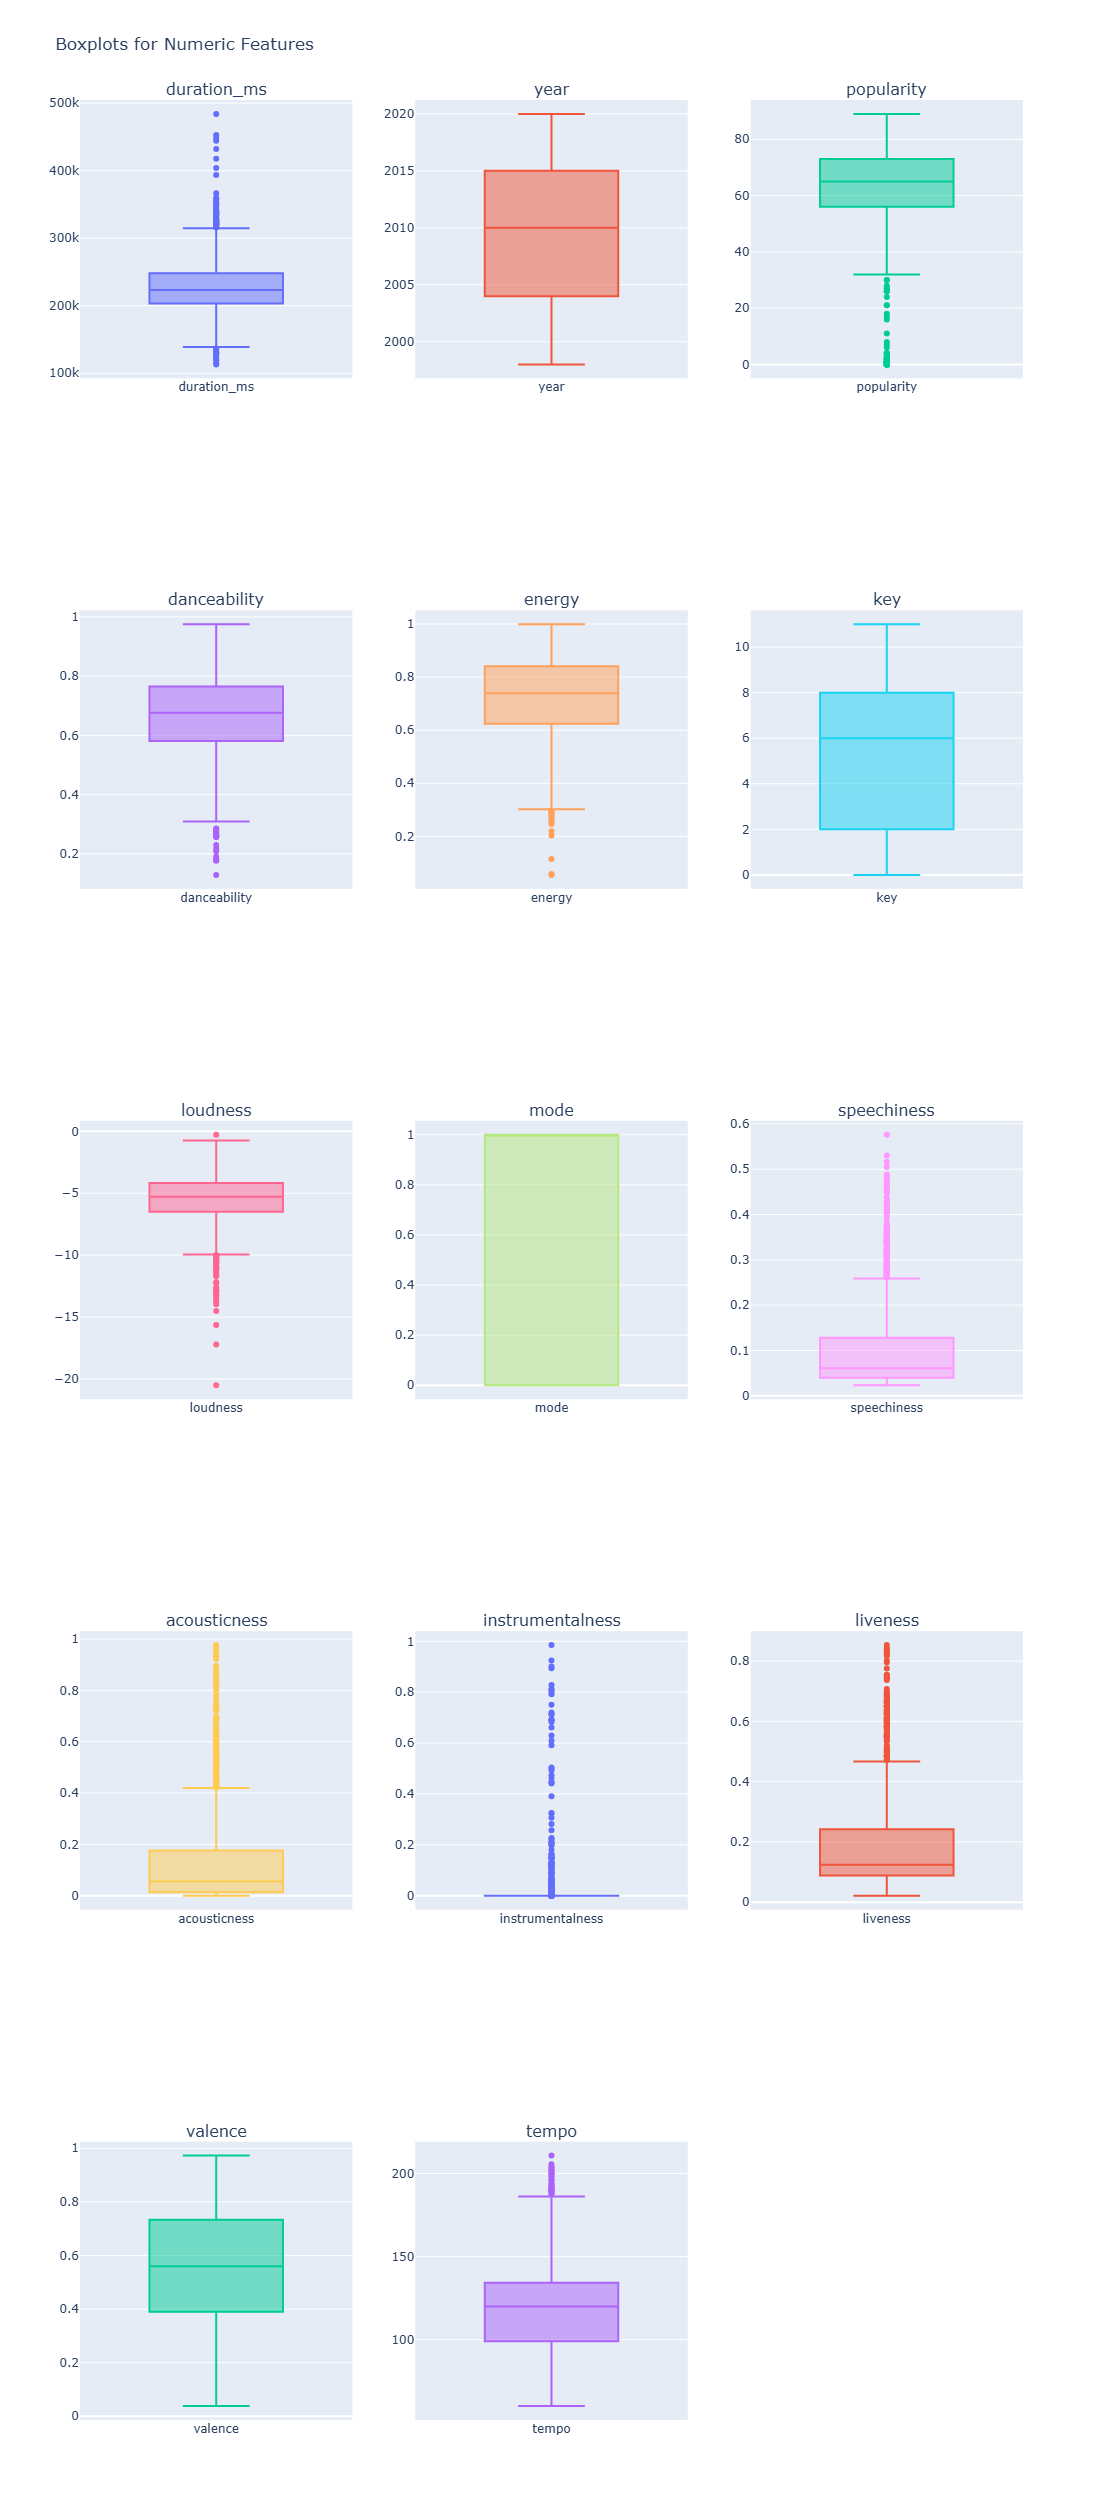

In [281]:
cols = cols = df.select_dtypes(include=[np.number]).columns
num_cols = len(cols)

n_rows = math.ceil(num_cols / 3)  
n_cols = 3

fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=cols)

for i, col in enumerate(cols):
    row = i // n_cols + 1
    col_pos = i % n_cols + 1
    fig.add_trace(
        go.Box(y=df[col], name=col),
        row=row, col=col_pos
    )

fig.update_layout(height=500 * n_rows, width=1000, title_text="Boxplots for Numeric Features", showlegend=False)
fig.show()


**Insights from Boxplots**

**After plotting the boxplots for the numerical features, we noticed the presence of several outliers across different columns. However, these outliers are not necessarily data errors. Given the wide variety of music genres and song styles in the dataset, such variations are expected. Different genres can have distinct characteristics in terms of tempo, energy, loudness, and other audio features, which naturally leads to a broader range of values.**



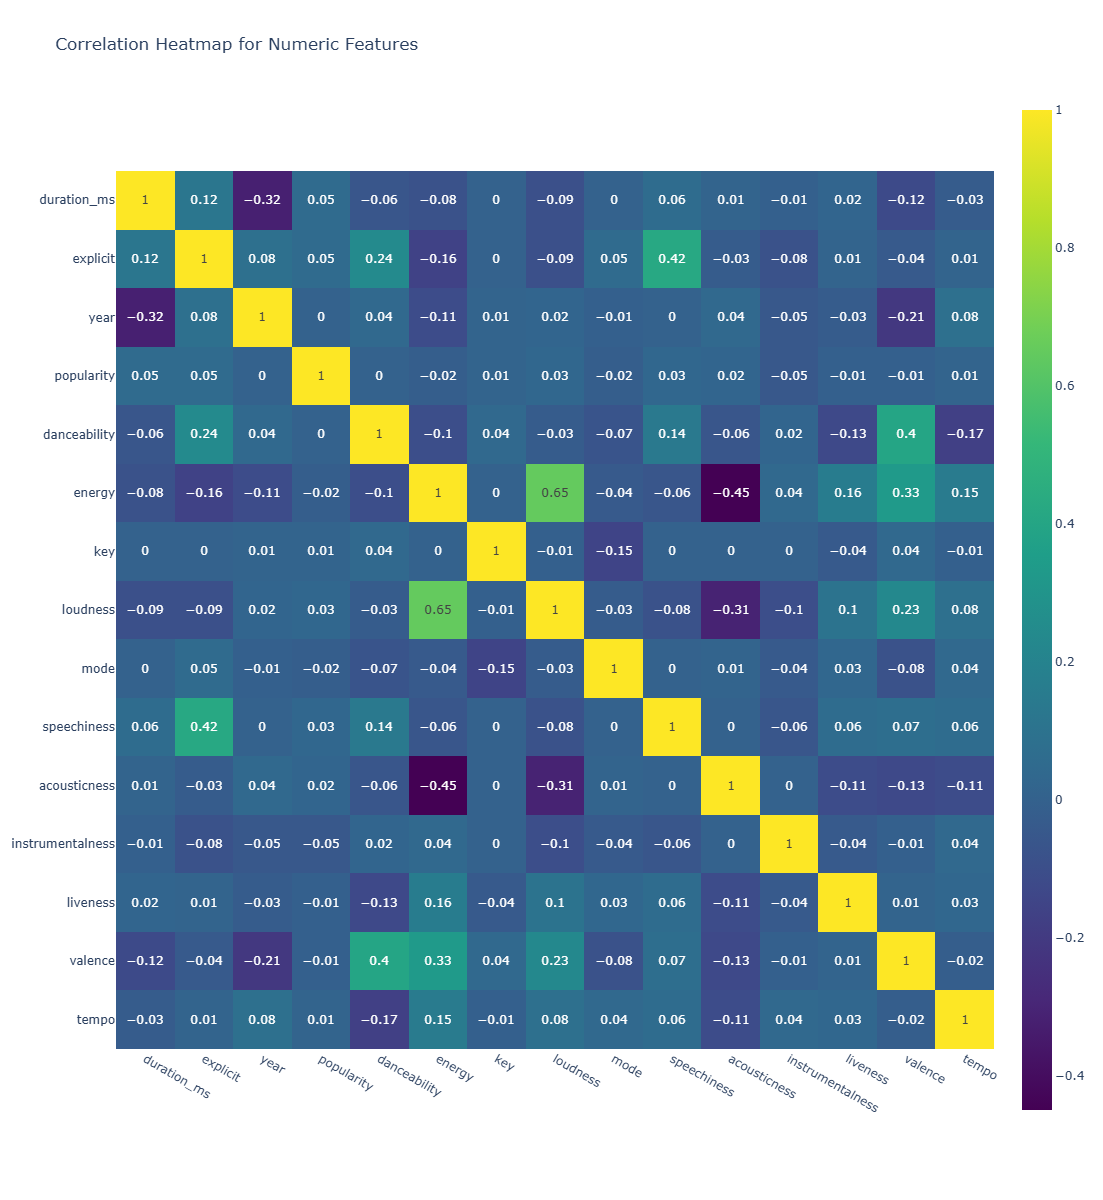

In [283]:
# Before we create heatmap I will convert the 'explicit' column to numeric to get corrletion with other columns 
# The True will be equal to 1 and False will be equal to 0
df['explicit'] = df['explicit'].astype(int)
corr = df.corr(numeric_only=True)
fig = px.imshow(corr.round(2),
                text_auto=True, 
                color_continuous_scale='Viridis', 
                title="Correlation Heatmap for Numeric Features"
                )
fig.update_layout(
    title="Correlation Heatmap for Numeric Features",
    width=1200, 
    height=1200
)
fig.show()

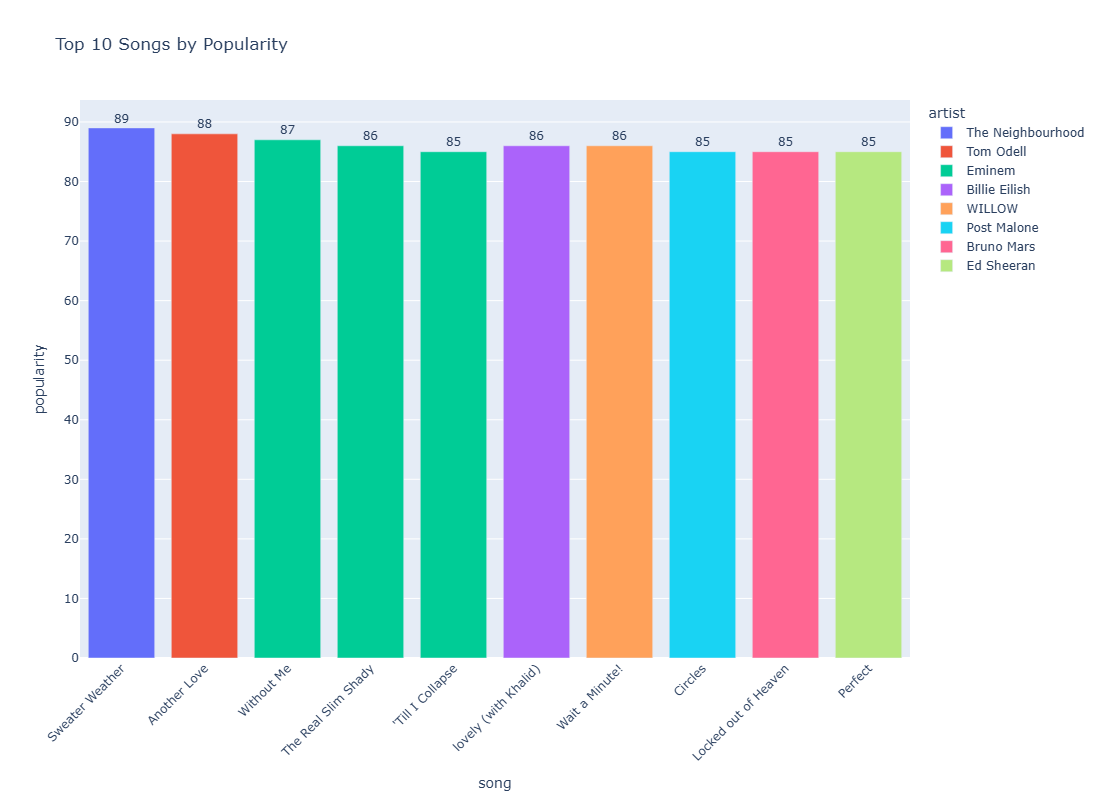

In [284]:
top_10_songs = df.sort_values(by='popularity', ascending=False).head(10)
fig = px.bar(top_10_songs, 
             x='song', 
             y='popularity', 
             color='artist', 
             text='popularity',
             title='Top 10 Songs by Popularity')

fig.update_traces(textposition='outside')
fig.update_layout(xaxis_tickangle=-45, height=800, width=800)
fig.show()

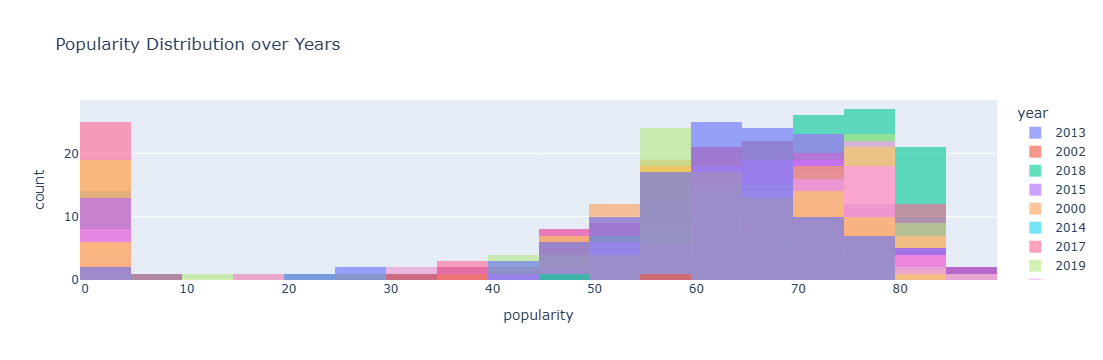

In [285]:
fig = px.histogram(df, 
                   x='popularity', 
                   color='year', 
                   nbins=30, 
                   title='Popularity Distribution over Years')

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.6)
fig.show()


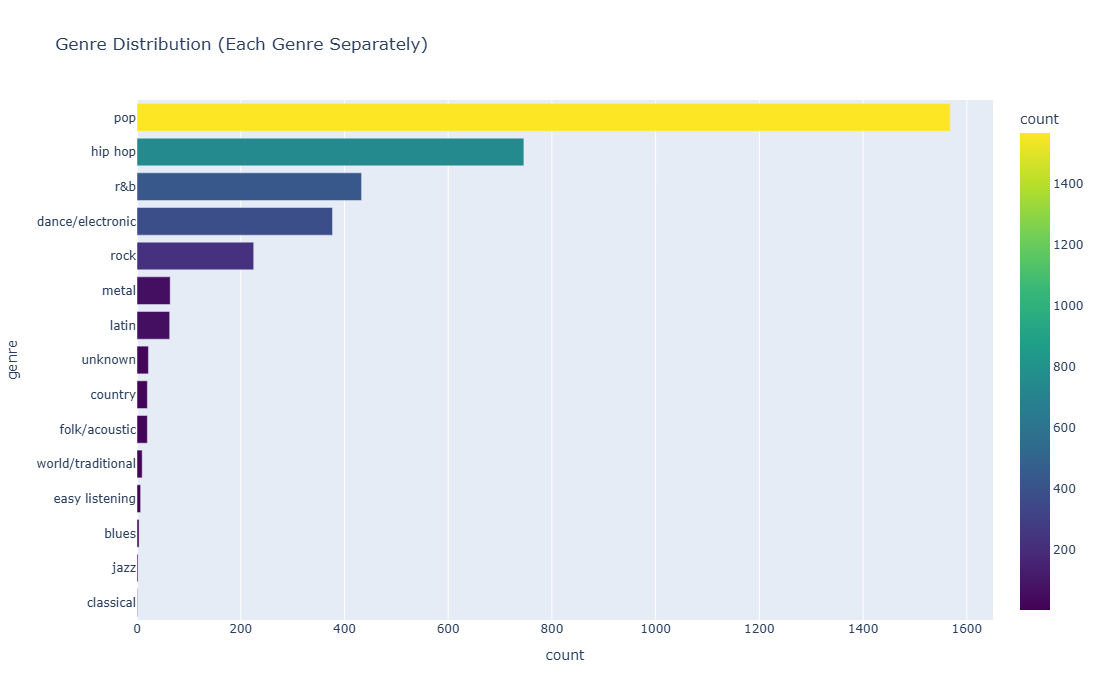

In [286]:
# to make the each genre in his own row
df['genre'] = df['genre'].str.lower().str.strip()
df_exploded = df.assign(genre=df['genre'].str.split(', ')).explode('genre')
df_exploded = df_exploded.dropna(subset=['genre'])
genre_counts = df_exploded['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']
fig = px.bar(
    genre_counts, 
    x='count', 
    y='genre', 
    orientation='h', 
    color='count',
    color_continuous_scale='viridis',
    title='Genre Distribution (Each Genre Separately)'
)

fig.update_layout(yaxis={'categoryorder':'total ascending'}, height=700)
fig.show()

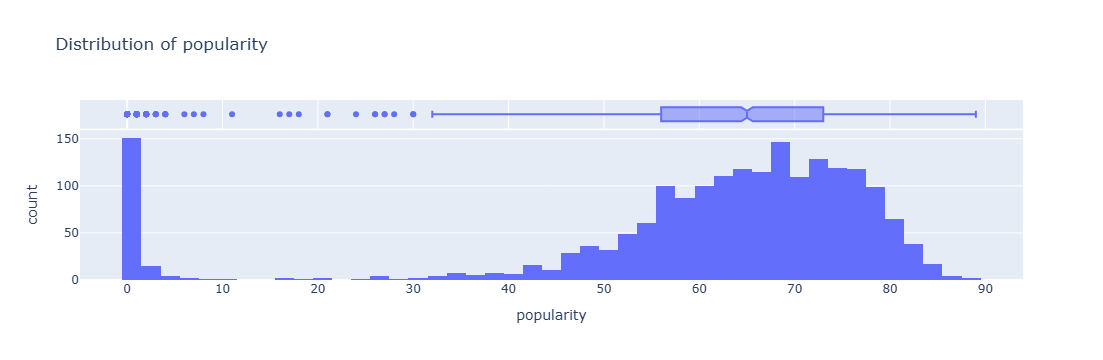

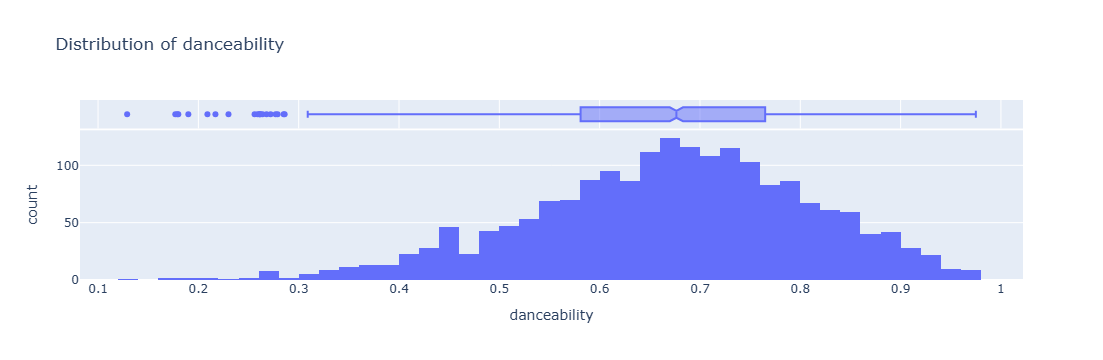

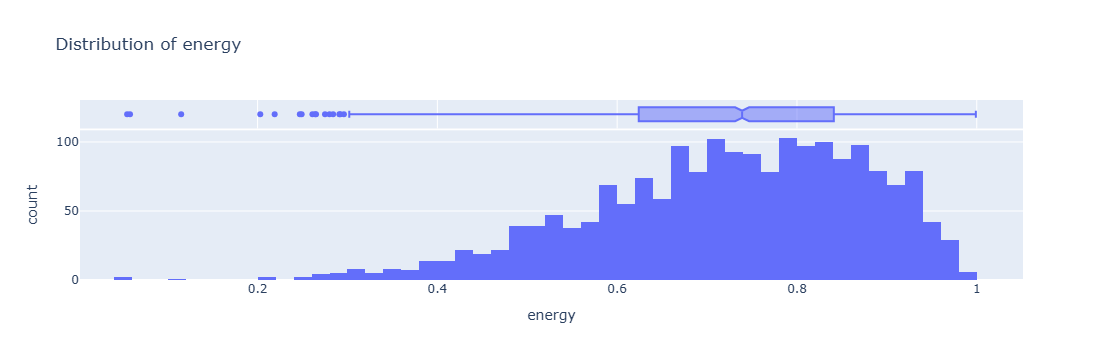

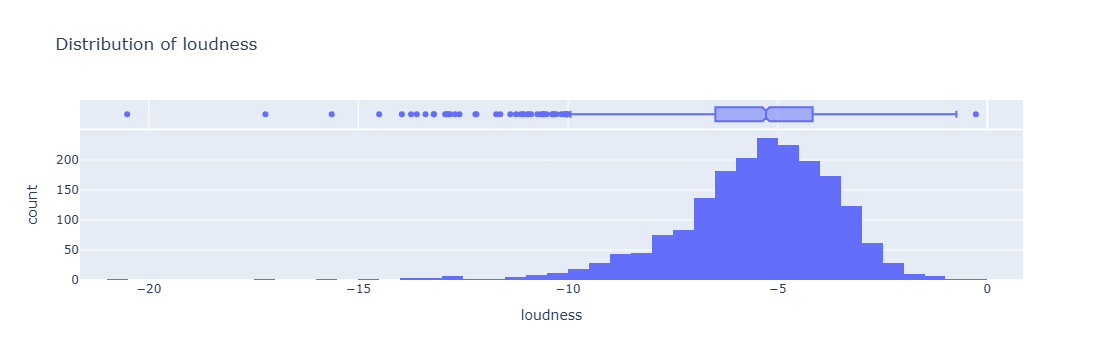

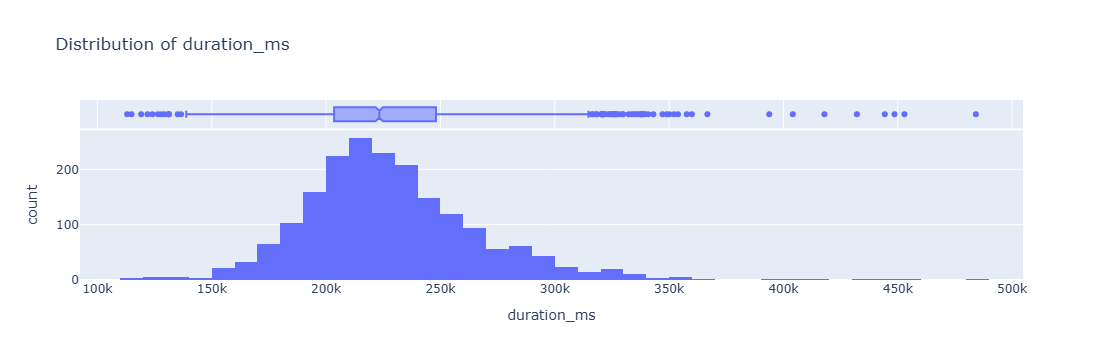

In [287]:
numerical_cols = ['popularity', 'danceability', 'energy', 'loudness', 'duration_ms']

for col in numerical_cols:
    fig = px.histogram(df, x=col, nbins=50, marginal="box", title=f'Distribution of {col}')
    fig.show()

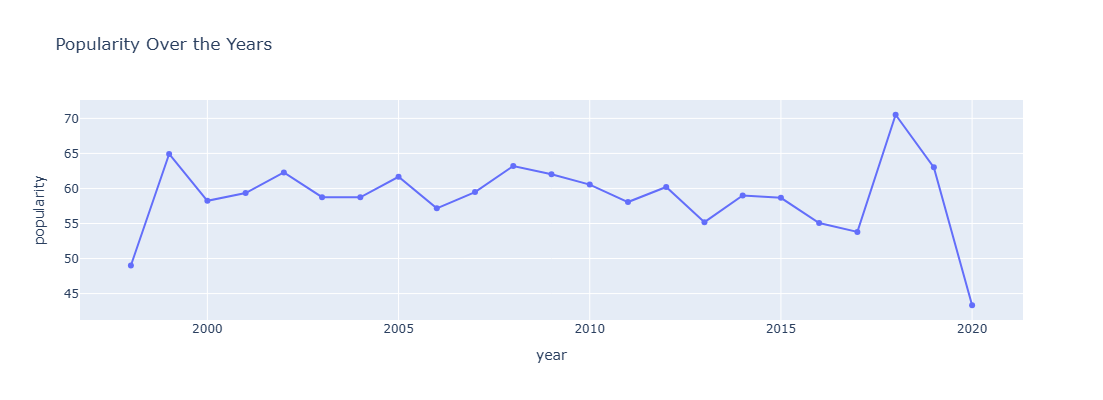

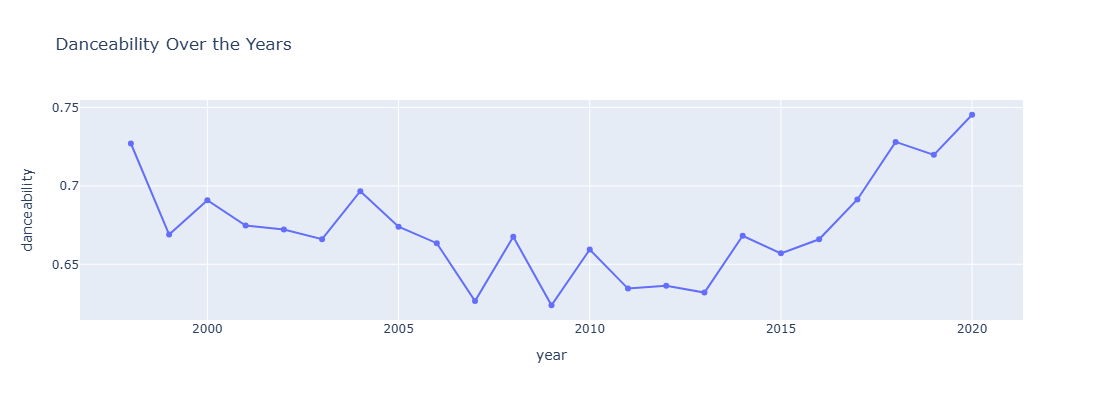

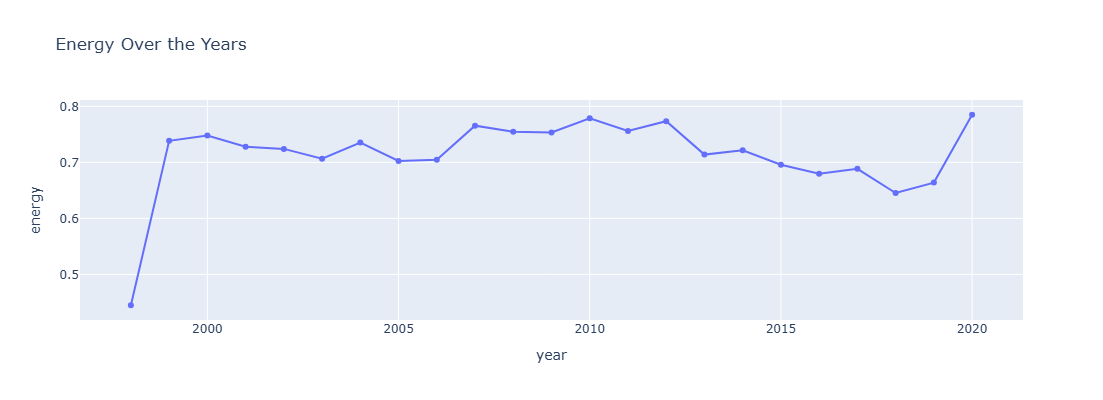

In [288]:
# Trend for Popularity
fig1 = px.line(trend_df, x='year', y='popularity', markers=True, title='Popularity Over the Years')
fig1.update_layout(width=800, height=400)
fig1.show()

# Trend for Danceability
fig2 = px.line(trend_df, x='year', y='danceability', markers=True, title='Danceability Over the Years')
fig2.update_layout(width=800, height=400)
fig2.show()

# Trend for Energy
fig3 = px.line(trend_df, x='year', y='energy', markers=True, title='Energy Over the Years')
fig3.update_layout(width=800, height=400)
fig3.show()

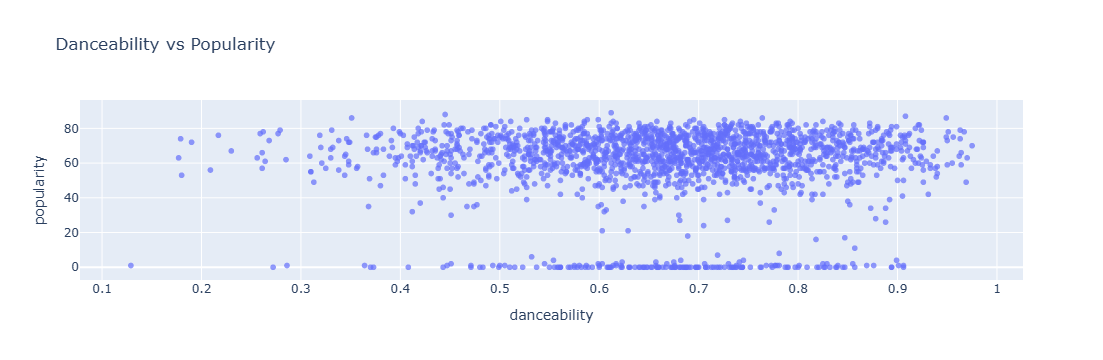

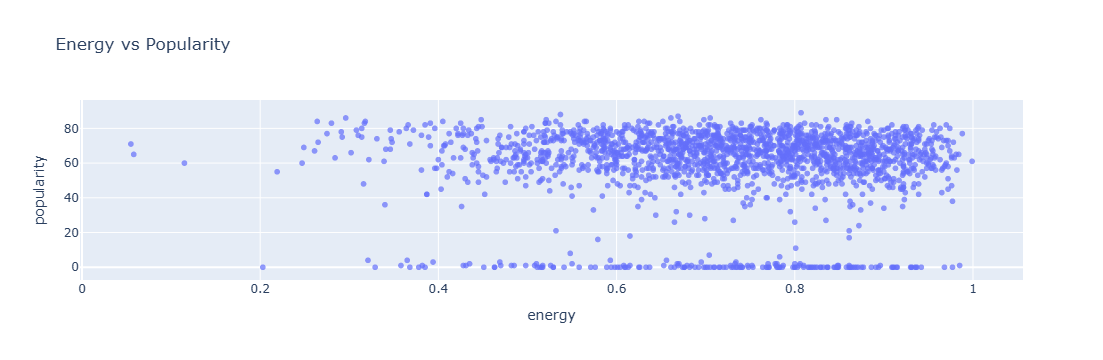

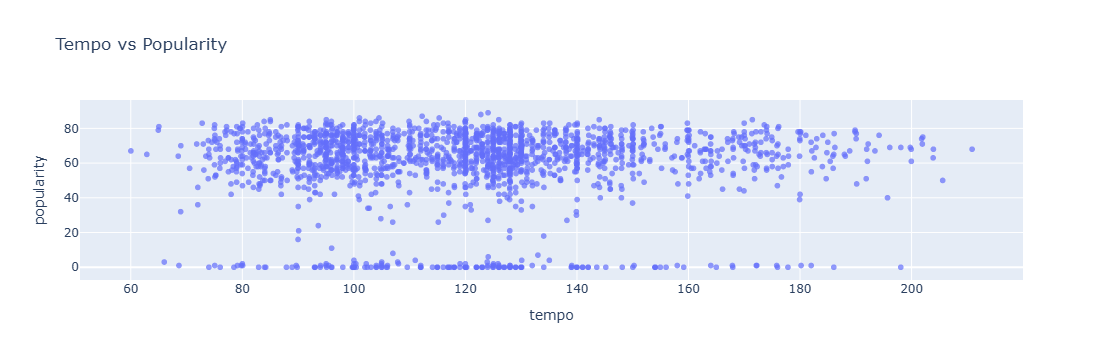

In [289]:
# scatter plot بين danceability و popularity
fig1 = px.scatter(df, x='danceability', y='popularity', 
                  title='Danceability vs Popularity',
                  opacity=0.7)
fig1.show()

# scatter plot بين energy و popularity
fig2 = px.scatter(df, x='energy', y='popularity', 
                  title='Energy vs Popularity',
                  opacity=0.7)
fig2.show()

# scatter plot بين tempo و popularity
fig3 = px.scatter(df, x='tempo', y='popularity', 
                  title='Tempo vs Popularity',
                  opacity=0.7)
fig3.show()

# Spotify Dataset EDA Summary

### 1. Dataset Overview
- The dataset contains audio features and metadata for the top 2000 Spotify tracks from 2000 to 2019.
- The dataset includes columns such as: `artist`, `song`, `year`, `popularity`, `danceability`, `energy`, `tempo`, `genre`, and more.

### 2. Data Cleaning
- Removed duplicate songs based on `song` and `artist`.
- Standardized text columns by removing extra spaces and converting text to lowercase.
- Fixed inconsistent values like treating "unknown" genres separately.
- Split multi-genre entries into individual genres for deeper analysis.

### 3. Univariate Analysis
- Generated **boxplots** for numeric features to detect the spread and presence of outliers.
- Found that outliers are present but may be valid due to the diversity of musical styles.

### 4. Bivariate Analysis
- Created **scatter plots** between `popularity` and key features like `danceability`, `energy`, and `tempo`.
- Discovered weak to moderate trends but no strong linear relationships.

### 5. Correlation Analysis
- Built a **heatmap** to examine correlations between numerical features.
- No very strong correlations, but some moderate relationships exist (e.g., between energy and danceability).

### 6. Genre Distribution
- Visualized the distribution of genres using a bar plot after splitting multi-genre rows.
- Found that genres like `pop`, `hip hop`, and `R&B` dominate the dataset.

### 7. Trends Over Time
- Analyzed trends of average **popularity**, **danceability**, and **energy** over the years using line charts.
- Noted fluctuations but no extreme trends across the years.

### Conclusion
- The dataset is diverse in terms of genres and audio features.
- No single factor explains a track’s popularity, suggesting that popularity may be influenced by a mix of musical and external factors.
- Further modeling coding a predictive model for popularity.
